# Simulations light inter

In [2]:
from __future__ import annotations

import math
import os
import sys
import time as t
from datetime import date
from multiprocessing import Pool

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

sys.path.append("../data") 
from archi_dict import archi_sorghum_angles as archi
from oawidgets.plantgl import *  # noqa: F403

from openalea.archicrop.display import build_scene, display_scene  # noqa: F401
from openalea.archicrop.simulation import (
    compute_extinction_coef,
    plot_constained_vs_pot,
    plot_constrainted_vs_realized,
    plot_extinction_coef,
    plot_faPAR,
    plot_PAR,
    run_simulations,
    write_netcdf,
)
from openalea.plantgl.all import Color3, Material, Scene  # noqa: F401

%gui qt

In [3]:
stics_color = "orange"
archicrop_color = "green"

In [4]:
tec_file_xml='../data/02NT18SorgV2D1_tec.xml'
plt_file_xml='../data/sorgho_imp_M_v10_plt.xml'
stics_output_file='../data/mod_s02NT18SorgV2D1.sti'
weather_file = '../data/ntarla_corr.2018'
location = {  
'longitude': 3.87,
'latitude': 12.58,
'altitude': 800,
'timezone': 'Europe/Paris'}

In [5]:
seed = 18

In [6]:
day_str = "2025-12-03"
ds = xr.open_dataset(f"D:/PhD_Oriane/simulations_ArchiCrop/{day_str}/results_light_inter_{seed}.nc")
ds

<xarray.Dataset> Size: 17MB
Dimensions:                 (id: 19, time: 120)
Coordinates:
  * id                      (id) int64 152B 0 1 2 3 4 5 6 ... 13 14 15 16 17 18
  * time                    (time) datetime64[ns] 960B 2018-06-30 ... 2018-10-27
Data variables: (12/44)
    thermal_time            (time) float64 960B ...
    lai_stics               (time) float64 960B ...
    sen_lai_stics           (time) float64 960B ...
    height_stics            (time) float64 960B ...
    inc_par                 (time) float64 960B ...
    abs_par_stics           (time) float64 960B ...
    ...                      ...
    leaf_lifespan           (id) float64 152B ...
    insertion_angle         (id) float64 152B ...
    nb_phy                  (id) float64 152B ...
    filter_1                (id) float64 152B ...
    filter_2                (id) float64 152B ...
    filter_3                (id) float64 152B ...

In [7]:
dates = ds.time.values
dates = pd.to_datetime(dates)
dates = dates.strftime('%Y-%m-%d')
thermal_time = ds.thermal_time.values
leaf_area_plant = ds.lai_stics.values
sen_leaf_area_plant = ds.sen_lai_stics.values
height_canopy = ds.height_stics.values
par_incident = ds.inc_par.values
par_stics = ds.abs_par_stics.values
density = float(ds.density.values)
# density = float(ds.sowing_density.values)

phyllotactic_angle = ds.phyllotactic_angle.values
insertion_angle = dict(zip(ds.id.values, ds.insertion_angle.values))
curvature = ds.curvature.values
scurv = ds.scurv.values

pot_la = dict(zip(ds.id.values, ds.pot_la.values))
pot_h = dict(zip(ds.id.values, ds.pot_h.values))
realized_la = dict(zip(ds.id.values, ds.realized_la.values))
realized_h = dict(zip(ds.id.values, ds.realized_h.values))
nrj_per_plant = dict(zip(ds.id.values, ds.nrj_per_plant.values))

In [8]:
ds.nrj_per_plant.values

array([[1.66517397e-04, 6.19972821e-04, 2.00798608e-03, ...,
        4.74879838e+00, 4.66930436e+00, 3.79660645e+00],
       [1.65531331e-04, 6.27813248e-04, 2.00169530e-03, ...,
        4.78228902e+00, 4.69422861e+00, 3.83108679e+00],
       [1.67212691e-04, 6.20284352e-04, 1.99382687e-03, ...,
        4.79583539e+00, 4.70379283e+00, 3.82055057e+00],
       ...,
       [1.18933118e-04, 4.33653016e-04, 1.26170301e-03, ...,
        4.33918177e+00, 4.14999615e+00, 3.31029408e+00],
       [1.16840809e-04, 4.22977144e-04, 1.22144741e-03, ...,
        4.33894717e+00, 4.14407330e+00, 3.31510698e+00],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [9]:
insertion_angle = {id:i for id,i in insertion_angle.items() if not math.isnan(i)}
nrj_per_plant = {id:nrj for id,nrj in nrj_per_plant.items() if id in insertion_angle and not math.isnan(nrj[0])}
insertion_angle

{1: 10.0,
 2: 14.7059,
 3: 19.4118,
 4: 24.1176,
 5: 28.8235,
 6: 33.5294,
 7: 38.2353,
 8: 42.9412,
 9: 47.6471,
 10: 52.3529,
 11: 57.0588,
 12: 61.7647,
 13: 66.4706,
 14: 71.1765,
 15: 75.8824,
 16: 80.5882,
 17: 85.2941,
 18: 90.0}

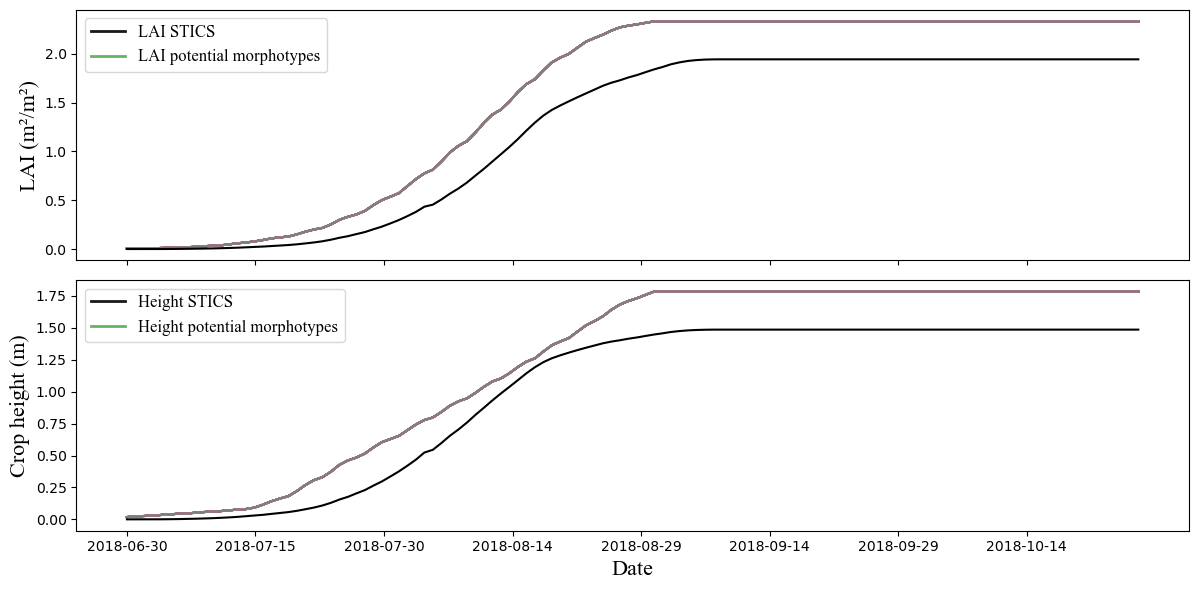

In [10]:
plot_constained_vs_pot(dates, pot_la, pot_h, leaf_area_plant, height_canopy, density, stics_color="black")

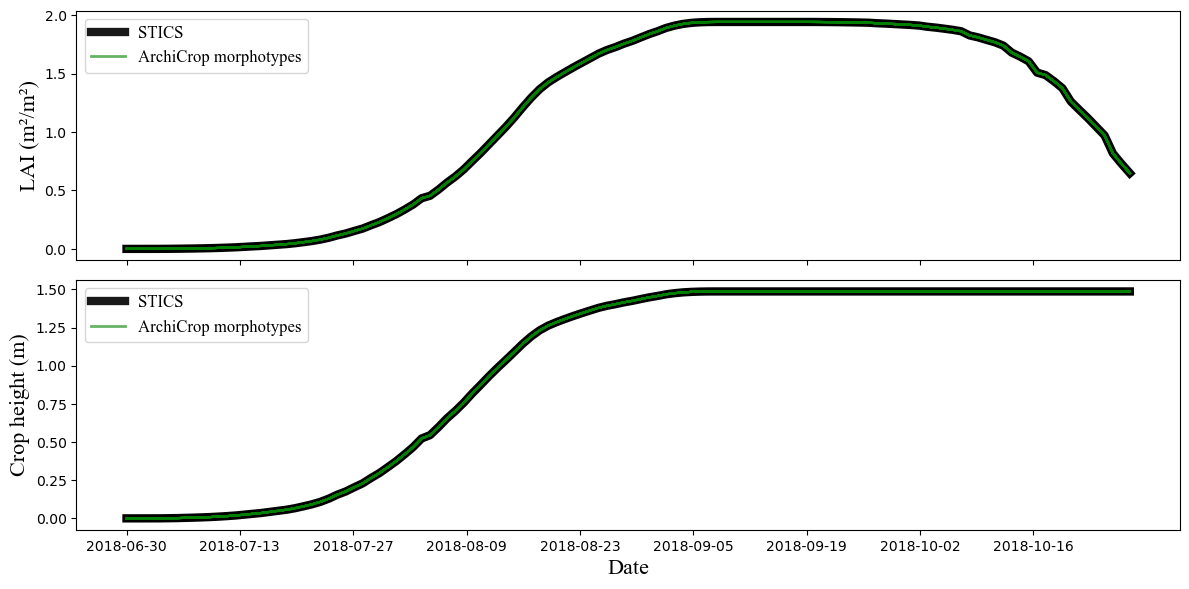

In [11]:
plot_constrainted_vs_realized(dates=dates, 
                              LA_archicrop=realized_la, 
                              height_archicrop=realized_h, 
                              leaf_area_plant=leaf_area_plant, 
                              sen_leaf_area_plant=sen_leaf_area_plant, 
                              height_canopy=height_canopy, 
                              density=density,
                              stics_color="black")


In [12]:
# Energy in Caribu : MJ.day-1
# Irradiance in Caribu : MJ.m[leaf]-2.day-1
# Incident PAR in STICS : MJ.m[soil]-2.day-1
# Absorbed PAR in STICS : MJ.m[soil]-2.day-1

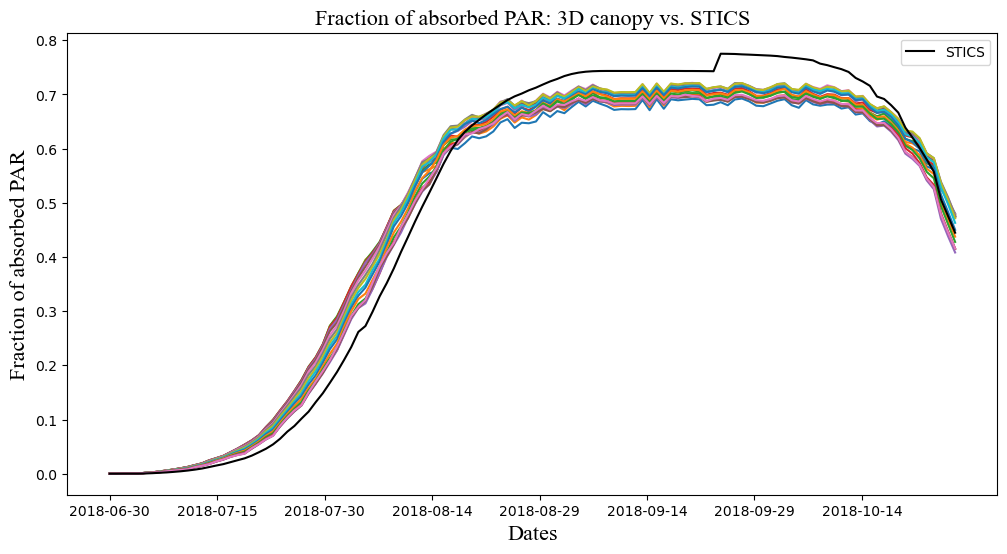

In [13]:
plot_faPAR(dates, nrj_per_plant, par_incident, par_stics, density, stics_color="black")

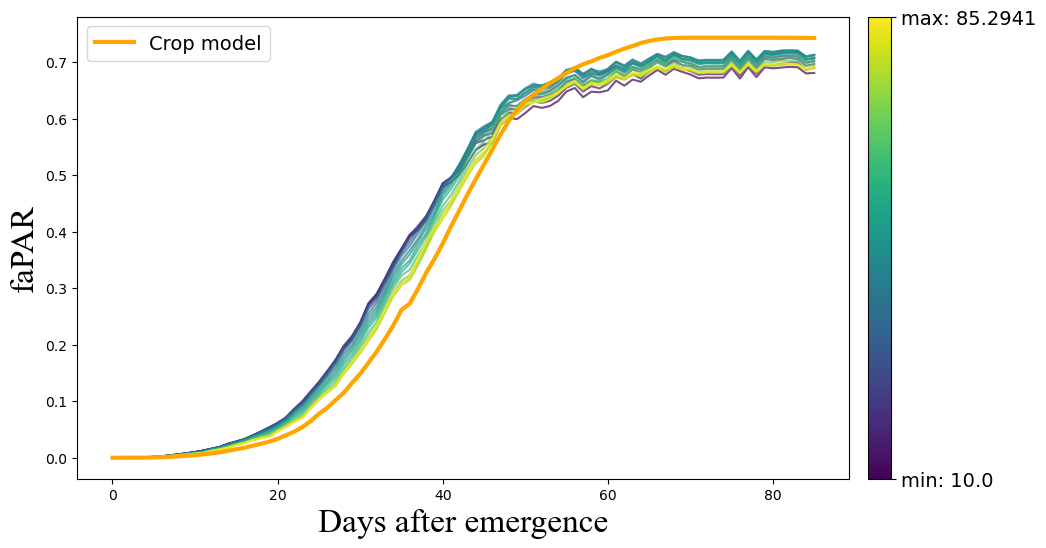

In [14]:
def plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, parameter, parameter_name, archicrop_color, stics_color):
    end = len(dates)-34
    fig, ax = plt.subplots(figsize=(12, 6))
    # for k,curve in nrj_per_plant.items():
    #     # ax.plot(dates, [nrj*density/par for nrj,par in zip(curve, par_incident)]) #, color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")
    #     label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == min(parameter) or parameter[k] == max(parameter) else None
    #     alpha = (parameter[k]-min(archi[parameter_name]))/(max(parameter)-min(archi[parameter_name]))
    #     ax.plot(dates, [nrj/par for nrj,par in zip(curve, par_incident)], color=archicrop_color, alpha=alpha, label=label) #, label=f"{parameter[k]}") #, color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")

    # Normalize parameter values to [0, 1] for colormap
    param_values = np.array([parameter[k] for k in nrj_per_plant])
    norm = plt.Normalize(param_values.min(), param_values.max())
    cmap = plt.get_cmap('viridis')  # You can choose any matplotlib colormap

    for k, curve in nrj_per_plant.items():
        color = cmap(norm(parameter[k]))
        label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == param_values.min() or parameter[k] == param_values.max() else None
        ax.plot(range(end), [nrj/par for nrj, par in zip(curve[:end], par_incident[:end])], color=color, alpha=0.7) #, label=label)


    # ax.fill_between(time_points, min_values, max_values, color="skyblue", alpha=0.4)
    # ax.plot(time_points, min_values, color="blue", linestyle="--", label="Min 3D")
    # ax.plot(time_points, max_values, color="red", linestyle="--", label="Max 3D")
    ax.plot(range(end), par_stics[:end], color=stics_color, linewidth=3, label="Crop model")

    # Labels and legend
    # ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
    ax.set_xlabel("Days after emergence", fontsize=24, fontname="Times New Roman") 
    ax.set_ylabel("faPAR", fontsize=24, fontname="Times New Roman")
    # ax.set_title(f"faPAR as a function of {parameter_name}", fontsize=24, fontname="Times New Roman")

    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    # cbar.set_label(f"{parameter_name}")
    cbar.set_ticks([param_values.min(), param_values.max()])
    cbar.set_ticklabels([f"min: {param_values.min()}", f"max: {param_values.max()}"], fontsize=14)


    ax.legend(fontsize=14)

    # Save figure
    today_str = date.today().strftime("%Y-%m-%d")
    os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
    plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_faPAR_{parameter_name}.png")

    plt.show()


# plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, phyllotactic_angle, 'phyllotactic_angle', archicrop_color, stics_color='orange')
plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, insertion_angle, 'insertion_angle', archicrop_color, stics_color='orange')
# plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, curvature, 'curvature', archicrop_color, stics_color='orange')
# plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, scurv, 'scurv', archicrop_color, stics_color='orange')

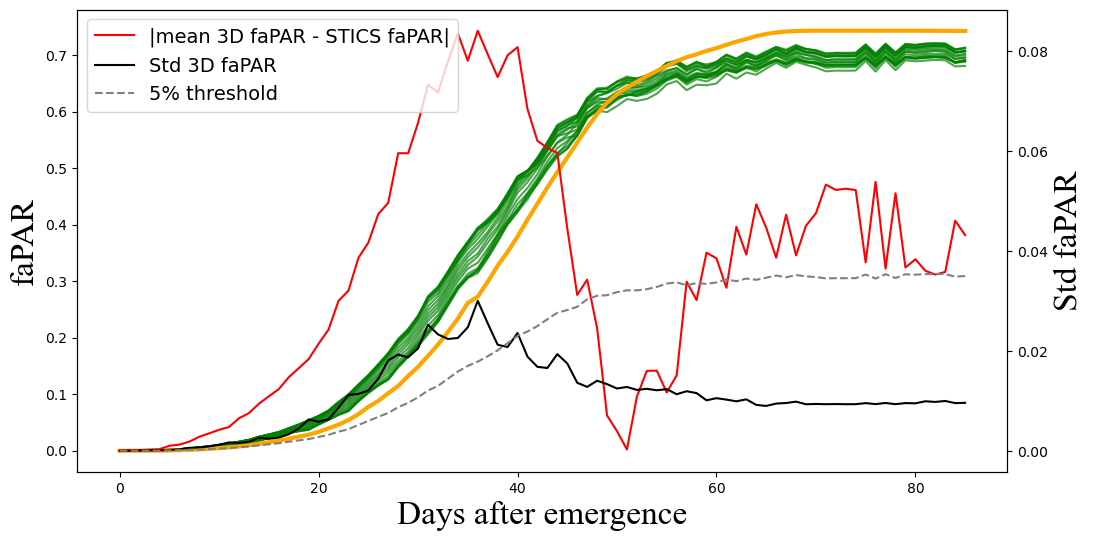

In [48]:
def plot_faPAR_variance(dates, nrj_per_plant, par_incident, par_stics, archicrop_color, stics_color):
    end = len(dates)-34
    fig, ax = plt.subplots(figsize=(12, 6))

    variance = []
    diff = []
    mean = []
    for i in range(end):
        faPAR_values = []
        for k, curve in nrj_per_plant.items():
            faPAR = curve[i] / par_incident[i]
            faPAR_values.append(faPAR)
        variance.append(np.std(faPAR_values))
        diff.append(np.abs(np.mean(faPAR_values)-par_stics[i]))
        mean.append(np.mean(faPAR_values))
    ax1 = ax.twinx()
    ax1.plot(range(end), diff, color="red", label="|mean 3D faPAR - STICS faPAR|") 
    ax1.plot(range(end), variance, color="black", label="Std 3D faPAR")  
    ax1.plot(range(end), [0.05*mean[i] for i in range(end)], color="grey", linestyle="--", label="5% threshold")

    for k, curve in nrj_per_plant.items():
        ax.plot(range(end), [nrj/par for nrj, par in zip(curve[:end], par_incident[:end])], color=archicrop_color, alpha=0.7)


    # ax.fill_between(time_points, min_values, max_values, color="skyblue", alpha=0.4)
    # ax.plot(time_points, min_values, color="blue", linestyle="--", label="Min 3D")
    # ax.plot(time_points, max_values, color="red", linestyle="--", label="Max 3D")
    ax.plot(range(end), par_stics[:end], color=stics_color, linewidth=3, label="Crop model")


    # Labels and legend
    # ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
    ax.set_xlabel("Days after emergence", fontsize=24, fontname="Times New Roman") 
    ax.set_ylabel("faPAR", fontsize=24, fontname="Times New Roman")
    ax1.set_ylabel("Std faPAR", fontsize=24, fontname="Times New Roman")
    # ax.set_title(f"faPAR as a function of {parameter_name}", fontsize=24, fontname="Times New Roman")


    # ax.legend(fontsize=14)
    ax1.legend(fontsize=14, loc='upper left')

    # Save figure
    today_str = date.today().strftime("%Y-%m-%d")
    os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
    plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_faPAR_variance.png")

    plt.show()


plot_faPAR_variance(dates, nrj_per_plant, par_incident, par_stics, archicrop_color, stics_color='orange')

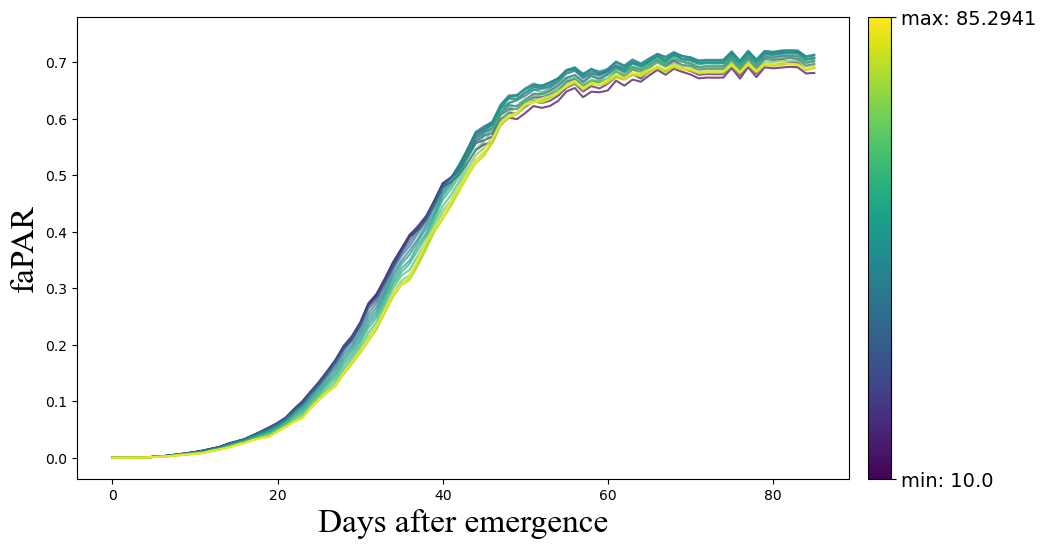

In [16]:
def plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, parameter, parameter_name, archicrop_color, stics_color):
    end = len(dates)-34
    fig, ax = plt.subplots(figsize=(12, 6))
    # for k,curve in nrj_per_plant.items():
    #     # ax.plot(dates, [nrj*density/par for nrj,par in zip(curve, par_incident)]) #, color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")
    #     label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == min(parameter) or parameter[k] == max(parameter) else None
    #     alpha = (parameter[k]-min(archi[parameter_name]))/(max(parameter)-min(archi[parameter_name]))
    #     ax.plot(dates, [nrj/par for nrj,par in zip(curve, par_incident)], color=archicrop_color, alpha=alpha, label=label) #, label=f"{parameter[k]}") #, color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")

    ax.plot(range(end), par_stics[:end], color="white", linewidth=3, label="Crop model")

    # Normalize parameter values to [0, 1] for colormap
    param_values = np.array([parameter[k] for k in nrj_per_plant])
    norm = plt.Normalize(param_values.min(), param_values.max())
    cmap = plt.get_cmap('viridis')  # You can choose any matplotlib colormap

    for k, curve in nrj_per_plant.items():
        color = cmap(norm(parameter[k]))
        label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == param_values.min() or parameter[k] == param_values.max() else None
        ax.plot(range(end), [nrj/par for nrj, par in zip(curve[:end], par_incident[:end])], color=color, alpha=0.7) #, label=label)


    # Labels and legend
    # ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
    ax.set_xlabel("Days after emergence", fontsize=24, fontname="Times New Roman") 
    ax.set_ylabel("faPAR", fontsize=24, fontname="Times New Roman")
    # ax.set_title(f"faPAR as a function of {parameter_name}", fontsize=24, fontname="Times New Roman")

    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    # cbar.set_label(f"{parameter_name}")
    cbar.set_ticks([param_values.min(), param_values.max()])
    cbar.set_ticklabels([f"min: {param_values.min()}", f"max: {param_values.max()}"], fontsize=14)


    # ax.legend(fontsize=14)

    # Save figure
    today_str = date.today().strftime("%Y-%m-%d")
    os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
    plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_faPAR_without_crop_{parameter_name}.png")

    plt.show()


plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, insertion_angle, 'insertion_angle', archicrop_color, stics_color='orange')


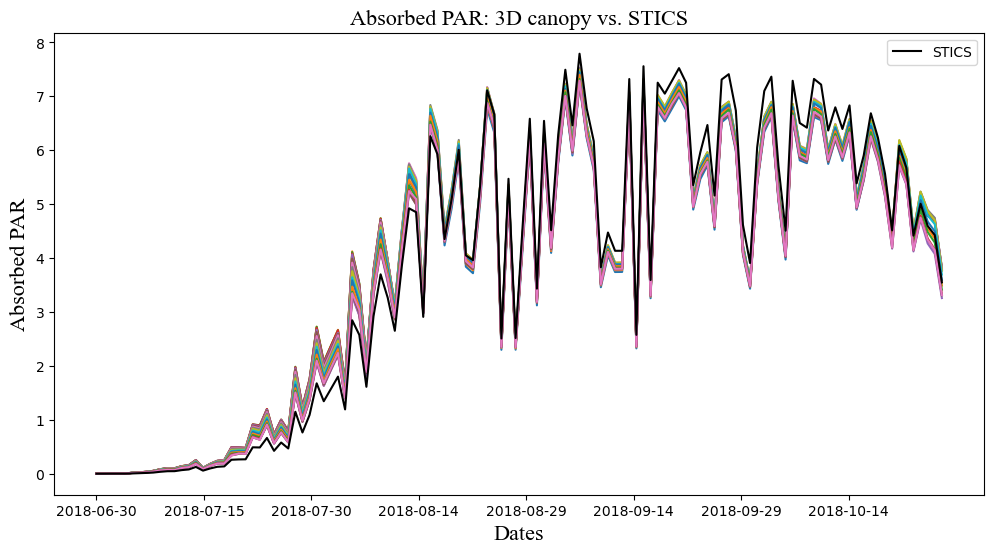

In [17]:
plot_PAR(dates, nrj_per_plant, par_incident, par_stics, density, stics_color="black")

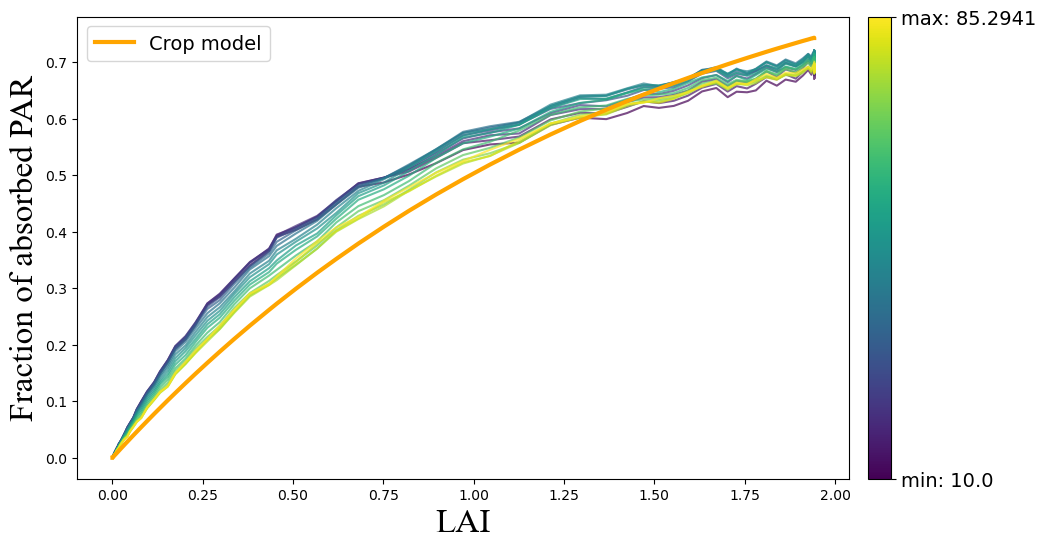

In [18]:
import matplotlib as mpl

def plot_faPAR_lai_parameter(lai, nrj_per_plant, par_incident, par_stics, density, archi, parameter, parameter_name, archicrop_color, stics_color):
    end = len(lai)-34
    fig, ax = plt.subplots(figsize=(12, 6))
    # for k,curve in nrj_per_plant.items():
    #     # ax.plot(dates, [nrj*density/par for nrj,par in zip(curve, par_incident)]) #, color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")
    #     label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == min(parameter) or parameter[k] == max(parameter) else None
    #     alpha = (parameter[k]-min(archi[parameter_name]))/(max(parameter)-min(archi[parameter_name]))
    #     ax.plot(dates, [nrj/par for nrj,par in zip(curve, par_incident)], color=archicrop_color, alpha=alpha, label=label) #, label=f"{parameter[k]}") #, color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")

    # Normalize parameter values to [0, 1] for colormap
    param_values = np.array([parameter[k] for k in nrj_per_plant])
    norm = plt.Normalize(param_values.min(), param_values.max())
    cmap = plt.get_cmap('viridis')  # You can choose any matplotlib colormap
    # cmap = (mpl.colors.ListedColormap(['green', 'orange', '#BF864D']))
    # bounds = [param_values.min(), param_values.min()+(param_values.max()-param_values.min())/3, param_values.min()+2*(param_values.max()-param_values.min())/3, param_values.max()]
    # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    for k, curve in nrj_per_plant.items():
        color = cmap(norm(parameter[k]))
        label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == param_values.min() or parameter[k] == param_values.max() else None
        ax.plot(lai[:end], [nrj/par for nrj, par in zip(curve, par_incident)][:end], color=color, alpha=0.7) #, label=label)


    # ax.fill_between(time_points, min_values, max_values, color="skyblue", alpha=0.4)
    # ax.plot(time_points, min_values, color="blue", linestyle="--", label="Min 3D")
    # ax.plot(time_points, max_values, color="red", linestyle="--", label="Max 3D")
    ax.plot(lai[:end], par_stics[:end], color=stics_color, linewidth=3, label="Crop model")

    # Labels and legend
    # ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
    ax.set_xlabel("LAI", fontsize=24, fontname="Times New Roman") 
    ax.set_ylabel("Fraction of absorbed PAR", fontsize=24, fontname="Times New Roman")
    # ax.set_title(f"faPAR as a function of {parameter_name}", fontsize=16, fontname="Times New Roman")

    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    # cbar.set_label(f"{parameter_name}")
    cbar.set_ticks([param_values.min(), param_values.max()])
    cbar.set_ticklabels([f"min: {param_values.min()}", f"max: {param_values.max()}"], fontsize=14)


    ax.legend(fontsize=14)

    # Save figure
    today_str = date.today().strftime("%Y-%m-%d")
    os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
    plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_faPAR_LAI_{parameter_name}.png")

    plt.show()

cf_cm = 100
# lai = [(la-sen)*density/cf_cm**2 for la, sen in zip(leaf_area_plant, sen_leaf_area_plant)]
lai = [la *density/cf_cm**2 for la in leaf_area_plant]
# plot_faPAR_lai_parameter(lai, nrj_per_plant, par_incident, par_stics, density, archi, phyllotactic_angle, 'phyllotactic_angle', archicrop_color, stics_color='orange')
plot_faPAR_lai_parameter(lai, nrj_per_plant, par_incident, par_stics, density, archi, insertion_angle, 'insertion_angle', archicrop_color, stics_color='orange')
# plot_faPAR_lai_parameter(lai, nrj_per_plant, par_incident, par_stics, density, archi, curvature, 'curvature', archicrop_color, stics_color='orange')
# plot_faPAR_parameter(dates, nrj_per_plant, par_incident, par_stics, density, archi, scurv, 'scurv', archicrop_color, stics_color='black')

In [19]:
# see if sum eabs and esoil = 1
# see tests caribu (cf light vege manager in oa incubator)
# compute memory 

$$ raint(t)=0.95⋅parsurrgG⋅trg(t)⋅(1−exp(−extinP⋅(lai(t)+eai(t)))) $$

$$ parsurrgG = 0.48 $$

$$ extinP(maize) = 0.7 $$

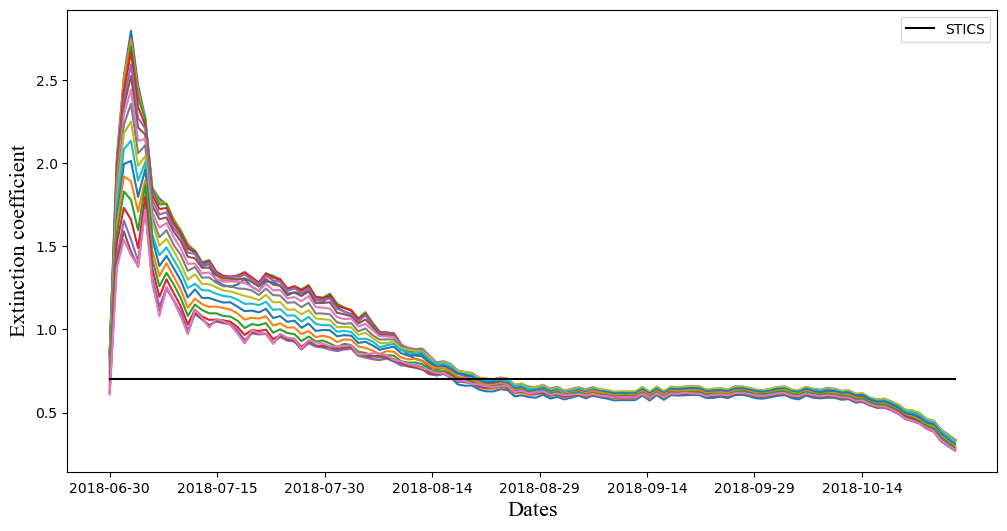

In [20]:
extinP_sorghum = 0.7

extin_coefs = compute_extinction_coef(nrj_per_plant, par_incident, leaf_area_plant, density)
plot_extinction_coef(extinP_stics=extinP_sorghum, extin_coefs=extin_coefs, dates=dates)

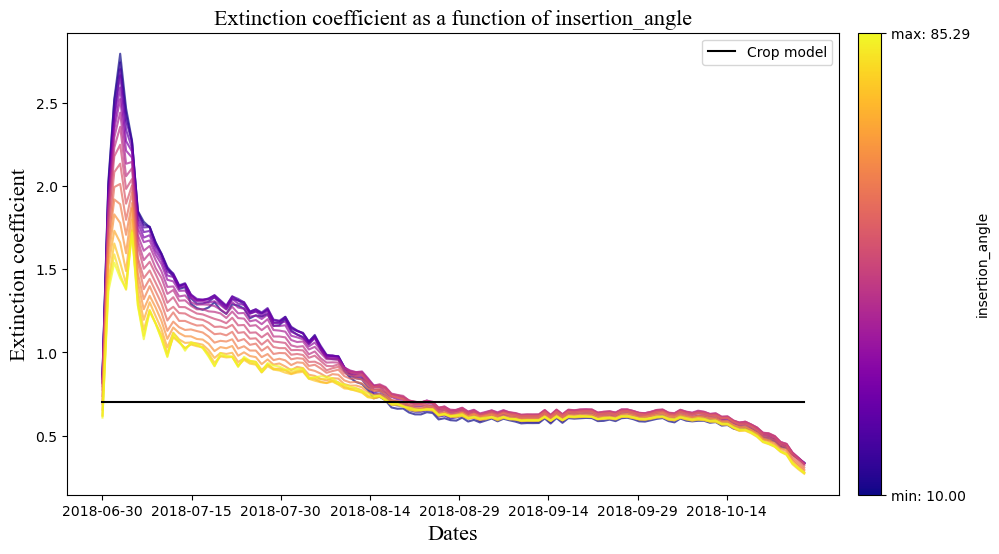

In [21]:
def plot_extinction_coef_parameter(extinP_stics, extin_coefs, dates, archi, parameter, parameter_name, archicrop_color, stics_color):
    fig, ax = plt.subplots(figsize=(12, 6))
    # lai = [la*density/10000 for la in leaf_area_plant]
    # Normalize parameter values to [0, 1] for colormap
    param_values = np.array([parameter[k] for k in nrj_per_plant])
    norm = plt.Normalize(param_values.min(), param_values.max())
    cmap = plt.get_cmap('plasma')

    # Plot each curve with color from colormap
    for k,curve in extin_coefs.items():
        color = cmap(norm(parameter[k]))
        ax.plot(dates, curve, color=color, alpha=0.7)
        # label = f"{parameter_name}={parameter[k]:.2f}" if parameter[k] == min(parameter) or parameter[k] == max(parameter) else None
        # alpha = (parameter[k]-min(archi[parameter_name]))/(max(parameter)-min(archi[parameter_name]))
        # ax.plot(dates, curve, color=archicrop_color, alpha=alpha, label=label)
    ax.plot(dates, [extinP_stics]*len(dates), color=stics_color, label="Crop model")
    ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
    ax.set_xlabel("Dates", fontsize=16, fontname="Times New Roman") 
    ax.set_ylabel("Extinction coefficient", fontsize=16, fontname="Times New Roman")
    ax.set_title(f"Extinction coefficient as a function of {parameter_name}", fontsize=16, fontname="Times New Roman")

    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(f"{parameter_name}")
    cbar.set_ticks([param_values.min(), param_values.max()])
    cbar.set_ticklabels([f"min: {param_values.min():.2f}", f"max: {param_values.max():.2f}"])


    ax.legend()

    # Save figure
    today_str = date.today().strftime("%Y-%m-%d")
    os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
    plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_extin_coef_{parameter_name}.png")

    plt.show()


# plot_extinction_coef_parameter(extinP_sorghum, extin_coefs, dates, archi, phyllotactic_angle, 'phyllotactic_angle', archicrop_color, stics_color='black')
plot_extinction_coef_parameter(extinP_sorghum, extin_coefs, dates, archi, insertion_angle, 'insertion_angle', archicrop_color, stics_color='black')
# plot_extinction_coef_parameter(extinP_sorghum, extin_coefs, dates, archi, curvature, 'curvature', archicrop_color, stics_color='black')
# plot_extinction_coef_parameter(extinP_sorghum, extin_coefs, dates, archi, scurv, 'scurv', archicrop_color, stics_color='black')

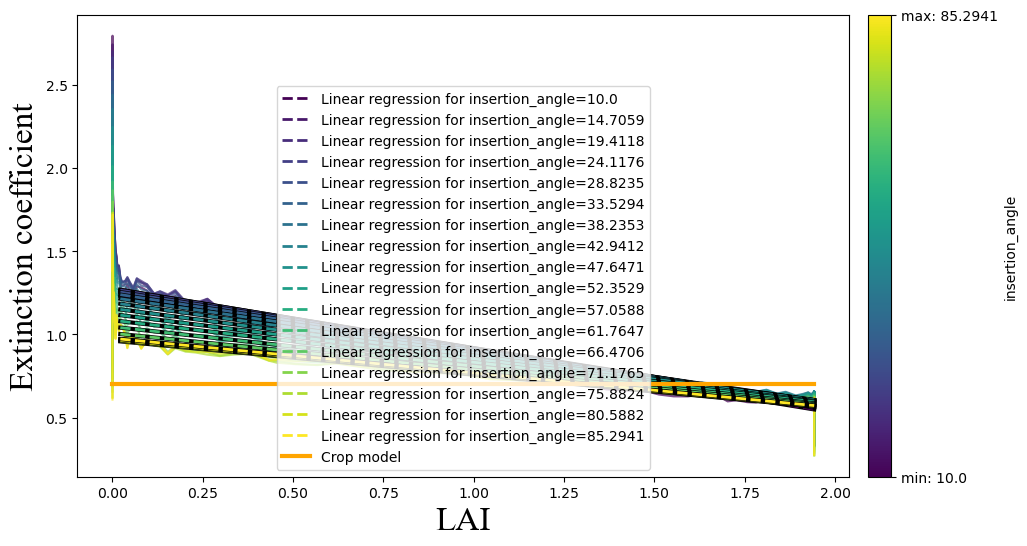

In [22]:
from sklearn.linear_model import LinearRegression

def plot_extinction_coef_lai_parameter(extinP_stics, extinP_list, lai, archi, parameter, parameter_name, archicrop_color, stics_color):

    start = 15
    end = len(lai)-1
    lai_trunc = lai[start:end]


    fig, ax = plt.subplots(figsize=(12, 6))
    # lai = [la*density/10000 for la in leaf_area_plant]
    # Normalize parameter values to [0, 1] for colormap
    param_values = np.array([parameter[k] for k in nrj_per_plant])
    norm = plt.Normalize(param_values.min(), param_values.max())
    cmap = plt.get_cmap('viridis')
    # cmap = (mpl.colors.ListedColormap(['green', 'orange', '#BF864D']))
    # bounds = [param_values.min(), param_values.min()+(param_values.max()-param_values.min())/3, param_values.min()+2*(param_values.max()-param_values.min())/3, param_values.max()]
    # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    regressions = {}

    # Plot each curve with color from colormap
    for k,curve in extin_coefs.items():
        if parameter[k] in regressions:
            regressions[parameter[k]].append(curve[start:end])
        else:
            regressions[parameter[k]] = [curve[start:end]]
        color = cmap(norm(parameter[k]))
        ax.plot(lai, curve, color=color, alpha=0.7)

    for parameter_value, curves in regressions.items():
        mean_series = np.array(curves).mean(axis=0)

        model = LinearRegression().fit(np.array(lai_trunc).reshape(-1,1), mean_series)
        slope = model.coef_[0]
        intercept = model.intercept_
        # equation = f"extinction coef = {slope:.3f}*LAI + {intercept:.3f}"
        fit_line = model.predict(np.array(lai_trunc).reshape(-1,1))
       
        # plt.plot([lai_trunc[0],lai_trunc[0]], [0,1.2], alpha=0.3, color="green")
        # plt.plot(lai_trunc, mean_series, color="black", linewidth=2, label="Mean series")
        color = cmap(norm(parameter_value))
        ax.plot(lai_trunc, fit_line, 
                color='black', linewidth=3, linestyle="-")
        ax.plot(lai_trunc, fit_line, 
                color=color, linewidth=2, linestyle="--", label=f"Linear regression for {parameter_name}={parameter_value}")

    ax.plot(lai, [extinP_stics]*len(lai), color=stics_color, linewidth=3, label="Crop model")
    # ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
    ax.set_xlabel("LAI", fontsize=24, fontname="Times New Roman") 
    ax.set_ylabel("Extinction coefficient", fontsize=24, fontname="Times New Roman")
    # ax.set_title(f"Extinction coefficient as a function of {parameter_name}", fontsize=16, fontname="Times New Roman")

    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(f"{parameter_name}")
    cbar.set_ticks([param_values.min(), param_values.max()])
    cbar.set_ticklabels([f"min: {param_values.min()}", f"max: {param_values.max()}"])


    ax.legend()

    # Save figure
    today_str = date.today().strftime("%Y-%m-%d")
    os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
    plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_extin_coef_LAI_{parameter_name}.png")

    plt.show()

# lai = [(la-sen)*density/cf_cm**2 for la, sen in zip(leaf_area_plant, sen_leaf_area_plant)]
lai = [la *density/cf_cm**2 for la in leaf_area_plant]
# plot_extinction_coef_lai_parameter(extinP_sorghum, extinP_list, lai, archi, phyllotactic_angle, 'phyllotactic_angle', archicrop_color, stics_color='orange')
plot_extinction_coef_lai_parameter(extinP_sorghum, extin_coefs, lai, archi, insertion_angle, 'insertion_angle', archicrop_color, stics_color='orange')
# plot_extinction_coef_lai_parameter(extinP_sorghum, extinP_list, lai, archi, curvature, 'curvature', archicrop_color, stics_color='orange')
# plot_extinction_coef_lai_parameter(extinP_sorghum, extinP_list, lai, archi, scurv, 'scurv', archicrop_color, stics_color='orange')

[1.21528144 1.19740251 1.19237094 1.17728503 1.16211898 1.16268573
 1.14435883 1.17448823 1.13413506 1.14143236 1.10186442 1.10595983
 1.07266169 1.10196656 1.05232702 1.05113406 1.05330665 1.01280368
 1.01015161 1.00506549 0.95932852 0.97272538 0.93840734 0.90921239
 0.91126318 0.90632884 0.86444064 0.84291    0.83517323 0.82975482
 0.79366073 0.76354967 0.76928769 0.74903051 0.71389535 0.70795412
 0.69996756 0.68000842 0.67061229 0.67037946 0.67850994 0.67189354
 0.63832814 0.64464471 0.62785013 0.62966699 0.63977912 0.61845447
 0.62772097 0.61026385 0.61803196 0.62816452 0.61343333 0.62732512
 0.61706547 0.61283593 0.60321549 0.60499543 0.60458099 0.60505182
 0.62979946 0.60229956 0.63200392 0.60608278 0.63157914 0.62868912
 0.63260064 0.6339309  0.6328443  0.61487121 0.61946324]
k = -0.27479889199149626 * x + 1.1300986436566862


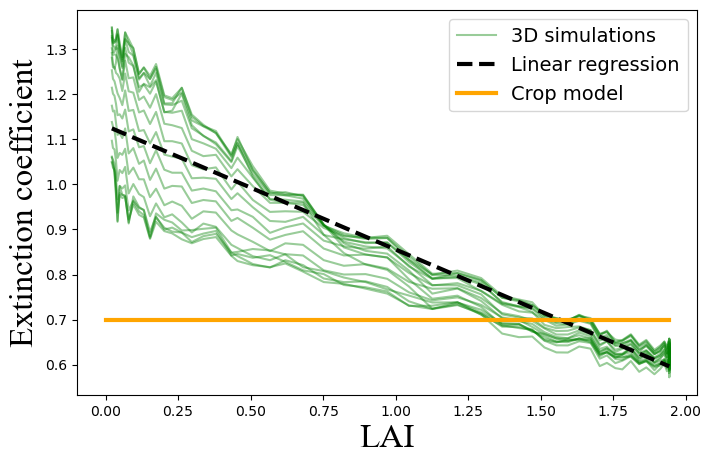

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

start = 15
end = len(lai)-34
k = [coef[start:end] for coef in extin_coefs.values()]
lai_trunc = lai[start:end]

mean_series = np.array(k).mean(axis=0)
print(mean_series)

model = LinearRegression().fit(np.array(lai_trunc).reshape(-1,1), mean_series)
slope = model.coef_[0]
intercept = model.intercept_
equation = f"extinction coef = {slope:.3f}*LAI + {intercept:.3f}"
print("k =", model.coef_[0], "* x +", model.intercept_)

fit_line = model.predict(np.array(lai_trunc).reshape(-1,1))

# --- Compute residuals of each run vs fitted line ---
residuals = np.array(k) - fit_line  # shape (n_runs, n_timesteps)

# Standard deviation across runs at each time step
std_residuals = residuals.std(axis=0)

plt.figure(figsize=(8,5))

label_set = False
for y in k:  
    if not label_set:
        plt.plot(lai_trunc, y, alpha=0.4, color="green", label="3D simulations")
        label_set = True
    else:
        plt.plot(lai_trunc, y, alpha=0.4, color="green")
    
# plt.plot([lai_trunc[0],lai_trunc[0]], [0,1.2], alpha=0.3, color="green")
# plt.plot(lai_trunc, mean_series, color="black", linewidth=2, label="Mean series")
plt.plot(lai_trunc, fit_line, 
         color="black", linewidth=3, linestyle="--", label="Linear regression")

# Add error band (±1 std)
# plt.fill_between(lai_trunc,
#                  fit_line - std_residuals,
#                  fit_line + std_residuals,
#                  color="green", alpha=0.3, label="±1 std deviation")

# plt.text(0.45*max(lai_trunc), 0.9*max(mean_series), equation,
#          fontsize=12, color="black", bbox=dict(facecolor="white", alpha=0.7))

plt.plot(lai, [extinP_sorghum]*len(lai), color="orange", linewidth=3, label="Crop model")

plt.xlabel("LAI", fontsize=24, fontname="Times New Roman")
plt.ylabel("Extinction coefficient", fontsize=24, fontname="Times New Roman")
plt.legend(fontsize=14)
# plt.title("Linear approximation of extinction coefficient as a function of LAI", fontsize=16, fontname="Times New Roman")

# Save figure
today_str = date.today().strftime("%Y-%m-%d")
os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_extin_coef_LAI_linear_regression.png")


plt.show()

[0.0151 0.0177 0.0213 0.0249 0.0284 0.0334 0.0396 0.0461 0.0542 0.0647
 0.0776 0.0881 0.1017 0.1146 0.1321 0.1485 0.1679 0.1878 0.2102 0.2337
 0.2617 0.2726 0.2989 0.3274 0.3518 0.379  0.4091 0.4372 0.4659 0.493
 0.5189 0.5453 0.5721 0.5959 0.6158 0.6311 0.6427 0.6531 0.663  0.6721
 0.681  0.6896 0.6964 0.7016 0.7076 0.7125 0.7184 0.724  0.7286 0.7339
 0.7376 0.7402 0.7419 0.7428 0.7432 0.7433 0.7433 0.7433 0.7433 0.7433
 0.7433 0.7433 0.7433 0.7433 0.7433 0.7433 0.7432 0.7432 0.7431 0.743
 0.7428]
Mean R² between regression faPAR and 3D faPAR: 0.9938993409354339
R² between regression faPAR and crop faPAR: 0.959145184797875
R² between 3D faPAR and crop faPAR: 0.9581439114541607


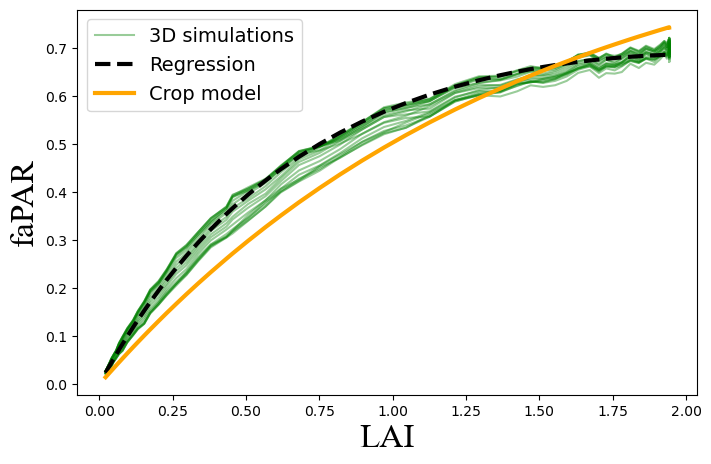

In [24]:
faPAR_trunc = [nrj[start:end] for nrj in nrj_per_plant.values()]
new_faPAR = 1 - np.exp(-fit_line * np.array(lai_trunc))
faPAR_3D = [[nrj/par for nrj, par in zip(y, par_incident[start:end])] for y in faPAR_trunc]
print(par_stics[start:end])

# compute R² between new_faPAR and faPAR_3D
from sklearn.metrics import r2_score
r2_scores = [r2_score(faPAR_3D[i], new_faPAR) for i in range(len(faPAR_3D))]
# print(r2_scores)
mean_r2 = np.mean(r2_scores)
print("Mean R² between regression faPAR and 3D faPAR:", mean_r2)

r2_score_crop = r2_score(par_stics[start:end], new_faPAR)
print("R² between regression faPAR and crop faPAR:", r2_score_crop)

r2_scores_crop = [r2_score(faPAR_3D[i], par_stics[start:end]) for i in range(len(faPAR_3D))]
mean_r2_crop = np.mean(r2_scores_crop)
print("R² between 3D faPAR and crop faPAR:", mean_r2_crop)

# # --- Compute residuals of each run vs fitted line ---
# residuals = k - fit_line  # shape (n_runs, n_timesteps)
# # Standard deviation across runs at each time step
# std_residuals = residuals.std(axis=0)
# # Compute residual sum of squares (RSS)
# residuals = mean_series - fit_line
# rss = np.sum(residuals**2)
# # Number of data points
# n = len(mean_series)   # using mean series only
# k = 2                  # slope + intercept

# # BIC
# bic = n * np.log(rss/n) + k * np.log(n)
# print(f"BIC = {bic:.2f}")

# Y_pred = [new_faPAR for _ in range(len(faPAR_3D))]

# # Per-output R2
# r2_per_output = r2_score(faPAR_3D, Y_pred, multioutput='raw_values')
# # Aggregate R2 (unweighted average)
# r2_avg = r2_score(faPAR_3D, Y_pred, multioutput='uniform_average')
# # Variance-weighted aggregate
# r2_var_weighted = r2_score(faPAR_3D, Y_pred, multioutput='variance_weighted')

# print("R2 per output:", r2_per_output)
# print("Average R2:", r2_avg)
# print("Variance-weighted R2:", r2_var_weighted)

plt.figure(figsize=(8,5))

label_set = False
for y in faPAR_3D:  
    if not label_set:
        plt.plot(lai_trunc, y, alpha=0.4, color="green", label="3D simulations")
        label_set = True
    else:
        plt.plot(lai_trunc, y, alpha=0.4, color="green")
    


# plt.plot([lai_trunc[0],lai_trunc[0]], [0,1.2], alpha=0.3, color="green")
# plt.plot(lai_trunc, mean_series, color="black", linewidth=2, label="Mean series")
plt.plot(lai_trunc, new_faPAR, 
         color="black", linewidth=3, linestyle="--", label="Regression")

# Add error band (±1 std)
# plt.fill_between(lai_trunc,
#                  1 - np.exp(-(fit_line - std_residuals) * np.array(lai_trunc)),
#                  1 - np.exp(-(fit_line + std_residuals) * np.array(lai_trunc)),
#                  color="green", alpha=0.4, label="±1 std deviation")

# plt.text(0.45*max(lai_trunc), 0.9*max(mean_series), equation,
#          fontsize=12, color="black", bbox=dict(facecolor="white", alpha=0.7))

plt.plot(lai[start:end], par_stics[start:end], color="orange", linewidth=3, label="Crop model")

plt.xlabel("LAI", fontsize=24, fontname="Times New Roman")
plt.ylabel("faPAR", fontsize=24, fontname="Times New Roman")
plt.legend(fontsize=14)
# plt.title("Approximation of faPAR as a function of LAI", fontsize=16, fontname="Times New Roman")

# Save figure
today_str = date.today().strftime("%Y-%m-%d")
os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_faPAR_LAI_regression.png")


plt.show()

BIC linear = -610.31
BIC constant = -428.46


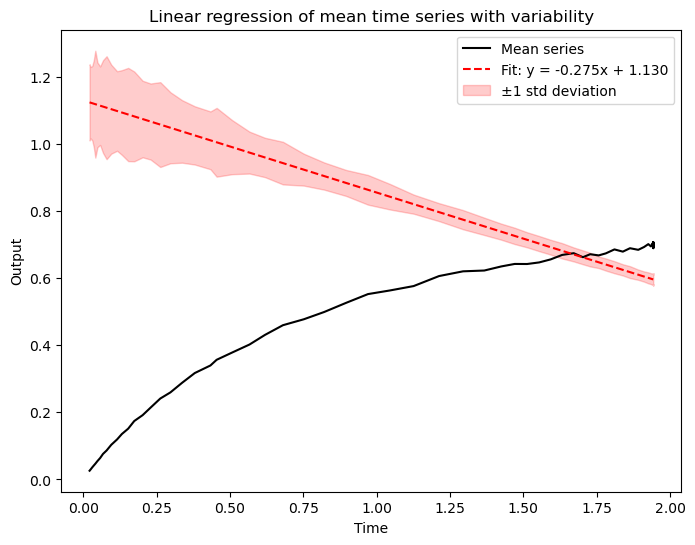

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mean_series = np.array(faPAR_3D).mean(axis=0)

# Compute residual sum of squares (RSS)
residuals = mean_series - new_faPAR
rss = np.sum(residuals**2)

# Number of data points
n = len(mean_series)   # using mean series only
nb_param = 2                  # slope + intercept

# BIC
bic = n * np.log(rss/n) + nb_param * np.log(n)
print(f"BIC linear = {bic:.2f}")



# Compute residual sum of squares (RSS)
residuals = mean_series - par_stics[start:end]
rss = np.sum(residuals**2)

# Number of data points
n = len(mean_series)   # using mean series only
nb_param = 1                 # slope + intercept

# BIC
bic = n * np.log(rss/n) + nb_param * np.log(n)
print(f"BIC constant = {bic:.2f}")



# --- Plot ---
plt.figure(figsize=(8,6))

# Plot mean series
plt.plot(lai_trunc, mean_series, label="Mean series", color="black")

# Plot linear fit
plt.plot(lai_trunc, fit_line, color="red", linestyle="--", label=f"Fit: y = {slope:.3f}x + {intercept:.3f}")

# Add error band (±1 std)
plt.fill_between(lai_trunc,
                 fit_line - std_residuals,
                 fit_line + std_residuals,
                 color="red", alpha=0.2, label="±1 std deviation")

plt.xlabel("Time")
plt.ylabel("Output")
plt.title("Linear regression of mean time series with variability")
plt.legend()
plt.show()


In [26]:
### Plot leaf lengths
for l in range(len(mtgs[1].properties()["leaf_lengths"].values())):  # noqa: E741
    # print(list(growing_plant[time[1]].properties()["leaf_lengths"].values()))
    # print(list(growing_plant[time[-1]].properties()["leaf_lengths"].values()))
    plt.plot(dates[1:], 
             [list(growing_plant[t].properties()["leaf_lengths"].values())[l][-1] - list(growing_plant[t].properties()["senescent_lengths"].values())[l][-1] for t in time[1:]], 
             color="green")

plt.xlabel("Thermal time")
plt.ylabel("Leaf length")
# plt.legend(loc="upper left")

plt.show()

NameError: name 'mtgs' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Example: say you did 50 model runs, each with 100 timesteps
n_runs = 27
n_timesteps = len(dates)

# phyllotactic_angle = ds.phyllotactic_angle.values
# insertion_angle = ds.insertion_angle.values
# curvature = ds.curvature.values

# nrj_per_plant = dict(zip(ds.id.values, ds.nrj_per_plant.values))
nrj_per_plant = ds.nrj_per_plant.values

# --- PCA on time series ---
scaler = StandardScaler()
outputs_scaled = scaler.fit_transform(nrj_per_plant)

pca = PCA(n_components=5)  # keep first 5 PCs
pcs = pca.fit_transform(outputs_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# --- Visualize first two PCs vs parameters ---
df = pd.DataFrame({
    "PC1": pcs[:,0],
    "PC2": pcs[:,1],
    "phyllotactic_angle": phyllotactic_angle,
    "insertion_angle": insertion_angle,
    "curvature": curvature
})

sns.pairplot(df, vars=["PC1", "PC2"], hue="phyllotactic_angle", palette="plasma")
plt.suptitle("Effect of phyllotactic_angle on PCs", y=1.02)
plt.show()

sns.pairplot(df, vars=["PC1", "PC2"], hue="insertion_angle", palette="plasma")
plt.suptitle("Effect of insertion_angle on PCs", y=1.02)
plt.show()

sns.pairplot(df, vars=["PC1", "PC2"], hue="curvature", palette="plasma")
plt.suptitle("Effect of curvature on PCs", y=1.02)
plt.show()

# sns.scatterplot(x="insertion_angle", y="PC1", data=df)
# plt.title("Effect of insertion_angle on PC1")
# plt.show()

# sns.scatterplot(x="curvature", y="PC2", data=df)
# plt.title("Effect of curvature on PC2")
# plt.show()


Explained variance ratio: [0.67981921 0.25726889 0.04272022 0.00814673 0.00565363]


ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

     Effect of phyllotactic_angle  Effect of insertion_angle  \
PC1                        -0.085                      0.256   
PC2                        -0.032                     -0.182   

     Effect of curvature     R²  
PC1                0.070  0.621  
PC2                0.053  0.742  


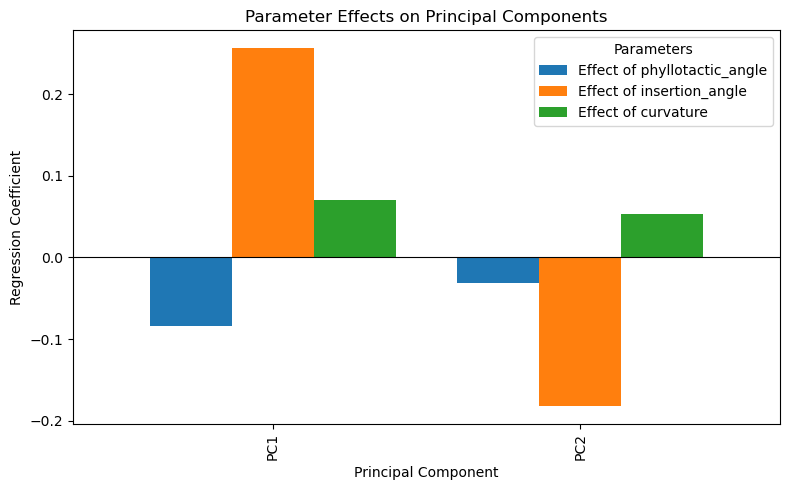

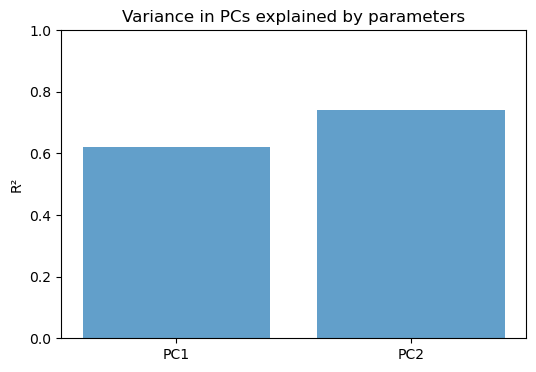

In [ ]:
from sklearn.linear_model import LinearRegression

# --- Sensitivity analysis: regress PCs on parameters ---
X = np.vstack([phyllotactic_angle, insertion_angle, curvature]).T  # inputs matrix
sensitivities = {}
rows = []

for i in range(2):  # check first 3 PCs
    y = pcs[:, i]
    model = LinearRegression().fit(X, y)
    row = list(model.coef_) + [model.score(X, y)]  # 3 coefs + R²
    rows.append(row)

df_sens = pd.DataFrame(
    rows,
    columns=["Effect of phyllotactic_angle", "Effect of insertion_angle", "Effect of curvature", "R²"],
    index=[f"PC{i+1}" for i in range(2)]
)

print(df_sens.round(3))



# --- Plot parameter effects per PC ---
ax = df_sens.drop(columns="R²").plot(
    kind="bar", figsize=(8,5), width=0.8
)

plt.title("Parameter Effects on Principal Components")
plt.ylabel("Regression Coefficient")
plt.xlabel("Principal Component")
plt.axhline(0, color="black", linewidth=0.8)
plt.legend(title="Parameters")
plt.tight_layout()
plt.show()

# --- Plot R² separately (how well PCs are explained by parameters) ---
plt.figure(figsize=(6,4))
plt.bar(df_sens.index, df_sens["R²"], alpha=0.7)
plt.ylabel("R²")
plt.title("Variance in PCs explained by parameters")
plt.ylim(0, 1)
plt.show()


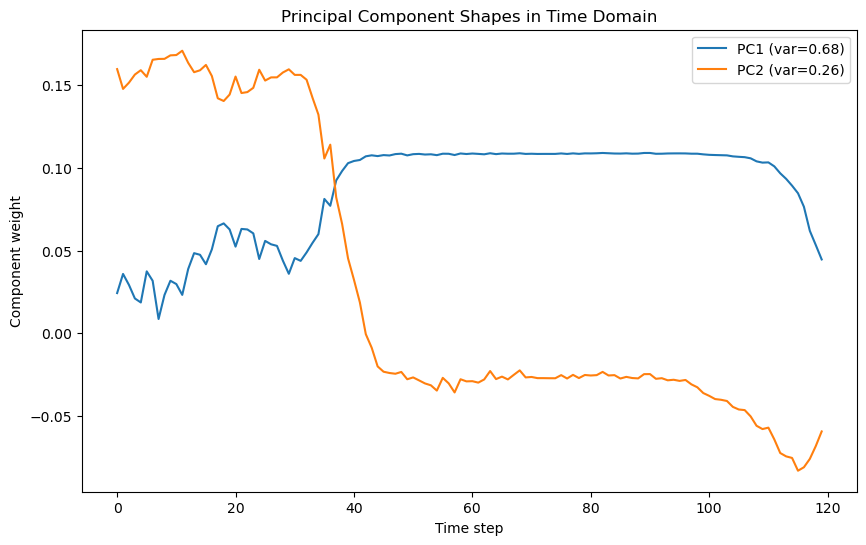

In [ ]:
# --- Plot the shape of the first few PCs ---
plt.figure(figsize=(10,6))

for i in range(2):  # first 3 PCs
    plt.plot(
        np.arange(n_timesteps),
        pca.components_[i],
        label=f"PC{i+1} (var={pca.explained_variance_ratio_[i]:.2f})"
    )

plt.xlabel("Time step")
plt.ylabel("Component weight")
plt.title("Principal Component Shapes in Time Domain")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# --- choose time window up to t ---
times = [20, 38, 80]

for t in times:
    outputs_t = nrj_per_plant[:, :t]  # shape = (n_runs, t)

    # --- PCA on truncated outputs ---
    scaler = StandardScaler()
    outputs_t_scaled = scaler.fit_transform(outputs_t)
    pca_t = PCA(n_components=2)
    scores_t = pca_t.fit_transform(outputs_t_scaled)

    # --- correlate parameters with PC scores ---
    params = np.vstack([phyllotactic_angle, insertion_angle, curvature]).T
    param_names = ["phyllotactic_angle", "insertion_angle", "curvature"]

    loadings = np.zeros((3, 2))
    for i in range(3):
        for j in range(2):
            loadings[i, j] = np.corrcoef(params[:, i], scores_t[:, j])[0, 1]

    # --- plot biplot ---
    plt.figure(figsize=(7,6))
    # plt.scatter(scores_t[:,0], scores_t[:,1], alpha=0.7)

    arrow_scale = 2.0
    for i, name in enumerate(param_names):
        plt.arrow(0, 0,
                loadings[i,0]*arrow_scale,
                loadings[i,1]*arrow_scale,
                color='red', head_width=0.05, length_includes_head=True)
        plt.text(loadings[i,0]*arrow_scale*1.1,
                loadings[i,1]*arrow_scale*1.1,
                name, color='red', ha='center', va='center')

    plt.xlabel(f"PC1 ({pca_t.explained_variance_ratio_[0]:.1%})")
    plt.ylabel(f"PC2 ({pca_t.explained_variance_ratio_[1]:.1%})")
    plt.title(f"PCA biplot using outputs up to time {t}")
    plt.axhline(0, color="gray", linewidth=0.5)
    plt.axvline(0, color="gray", linewidth=0.5)
    plt.show()



KeyError: (slice(None, None, None), slice(None, 20, None))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Parameters ---
window_size = 5  # number of timesteps in the window
times = [20, 38, 80]  # center time
half_win = window_size // 2

for t in times:
    # --- Extract local window around t ---
    outputs_window = nrj_per_plant[:, t-half_win : t+half_win+1]  # shape = (n_runs, window_size)

    # --- Standardize windowed outputs ---
    scaler = StandardScaler()
    outputs_scaled = scaler.fit_transform(outputs_window)

    # --- PCA ---
    pca = PCA(n_components=2)
    scores = pca.fit_transform(outputs_scaled)

    # --- Correlation of parameters with PCs (for arrows) ---
    params = np.vstack([phyllotactic_angle, insertion_angle, curvature]).T
    param_names = ["phyllotactic_angle", "insertion_angle", "curvature"]

    loadings = np.zeros((3, 2))
    for i in range(3):
        for j in range(2):
            loadings[i, j] = np.corrcoef(params[:, i], scores[:, j])[0, 1]

    # --- Biplot ---
    plt.figure(figsize=(7,6))
    plt.scatter(scores[:,0], scores[:,1], alpha=0.7)

    arrow_scale = 2.0
    for i, name in enumerate(param_names):
        plt.arrow(0, 0,
                loadings[i,0]*arrow_scale,
                loadings[i,1]*arrow_scale,
                color='red', head_width=0.05, length_includes_head=True)
        plt.text(loadings[i,0]*arrow_scale*1.1,
                loadings[i,1]*arrow_scale*1.1,
                name, color='red', ha='center', va='center')

    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
    plt.title(f"PCA biplot around {dates[t]}")
    plt.axhline(0, color="gray", linewidth=0.5)
    plt.axvline(0, color="gray", linewidth=0.5)
    plt.show()


KeyError: (slice(None, None, None), slice(18, 23, None))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Create interaction terms (p1*p2, p1*p3, p2*p3, p1*p2*p3)
X = np.vstack([phyllotactic_angle, insertion_angle, curvature]).T
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = poly.fit_transform(X)

# Regress first PC (or any PC) on parameters + interactions
y = scores[:,0]  # e.g., PC1 from the local window
model = LinearRegression().fit(X_interact, y)

# Inspect coefficients
coef_names = poly.get_feature_names_out(["phyllotactic_angle", "insertion_angle", "curvature"])
df_coef = pd.DataFrame({"Term": coef_names, "Coefficient": model.coef_})
print(df_coef)


                                 Term  Coefficient
0                  phyllotactic_angle    -0.031367
1                     insertion_angle     0.092460
2                           curvature     0.032431
3  phyllotactic_angle insertion_angle     0.000272
4        phyllotactic_angle curvature     0.000104
5           insertion_angle curvature    -0.000871


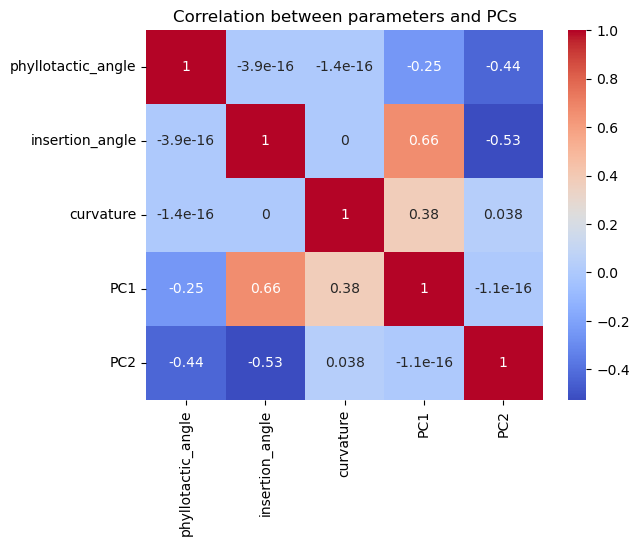

In [ ]:
import seaborn as sns

df = pd.DataFrame({
    "phyllotactic_angle": phyllotactic_angle,
    "insertion_angle": insertion_angle,
    "curvature": curvature,
    "PC1": scores[:,0],
    "PC2": scores[:,1]
})

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between parameters and PCs")
plt.show()

NameError: name 'scores' is not defined

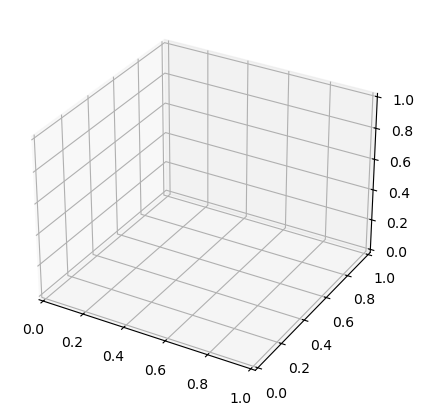

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(insertion_angle, curvature, scores[:,0], c=scores[:,0], cmap='plasma')
ax.set_xlabel("insertion_angle")
ax.set_ylabel("curvature")
ax.set_zlabel("PC1")
plt.title("Interaction between insertion_angle and curvature on PC1")
plt.show()

In [ ]:
from SALib.analyze import sobol

problem = {
    'num_vars': 4,
    'names': ['insertion_angle', 'curvature', 'phyllotactic_angle'],
    'bounds': []
}
for name in problem['names']:
    problem['bounds'].append([min(archi[name]), max(archi[name])])

N = len(extinP_list)
T = len(extinP_list[0])
d = problem['num_vars']

S_i = np.zeros((d, T))

for t in range(T):
    Y_t = np.array([extinP_list[i][t] for i in range(len(extinP_list))])
    Si = sobol.analyze(problem, Y_t, print_to_console=False) # ca marche pas parce que c'est un sampling LHS et pas Saltelli
    S_i[:, t] = Si['S1']

Si.plot()
# # S_i[i, t] = indice de Sobol du paramètre i à l'instant t
# for i,name in enumerate(problem['names']):
#     plt.plot(dates, S_i[i, :], label=name)
# plt.xlabel('Dates')
# plt.ylabel('Sobol indices')
# plt.legend()
# plt.show()

TypeError: 'float' object is not iterable

In [ ]:
"""
# vertical light interception
cs, ei, df = illuminate(scene, scene_unit='cm')
cs.plot(ei)


# diffuse light interception
sources = skys.sky_sources()
cs, ei, df = illuminate(scene, light=sources, scene_unit='cm')
cs.plot(ei)

# get score per plant
def score(res):
    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),
                              'area': res.area.sum()})
df['nump']=nump
df.groupby('nump').apply(score)
"""

"\n# vertical light interception\ncs, ei, df = illuminate(scene, scene_unit='cm')\ncs.plot(ei)\n\n\n# diffuse light interception\nsources = skys.sky_sources()\ncs, ei, df = illuminate(scene, light=sources, scene_unit='cm')\ncs.plot(ei)\n\n# get score per plant\ndef score(res):\n    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),\n                              'area': res.area.sum()})\ndf['nump']=nump\ndf.groupby('nump').apply(score)\n"